In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer

In [2]:
from qiskit_rigetti import RigettiQCSBackend, RigettiQCSJob, RigettiQCSProvider
from qiskit_rigetti import QuilCircuit

In [3]:
# Get provider and backend
provider = RigettiQCSProvider()
provider.backends()

[<RigettiQCSBackend('Aspen-11')>,
 <RigettiQCSBackend('Aspen-12')>,
 <RigettiQCSBackend('Aspen-M-2')>]

In [4]:
backend = provider.get_backend("Aspen-M-2")
backend

<RigettiQCSBackend('Aspen-M-2')>

In [5]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [6]:
num_qubits = 8
qr = QuantumRegister(num_qubits)
meas_calibs, state_labels = complete_meas_cal(qr=qr)
len(meas_calibs)

256

In [7]:
meas_calibs[0].draw()

░ ┌─┐                     
q0_0: ─░─┤M├─────────────────────
       ░ └╥┘┌─┐                  
q0_1: ─░──╫─┤M├──────────────────
       ░  ║ └╥┘┌─┐               
q0_2: ─░──╫──╫─┤M├───────────────
       ░  ║  ║ └╥┘┌─┐            
q0_3: ─░──╫──╫──╫─┤M├────────────
       ░  ║  ║  ║ └╥┘┌─┐         
q0_4: ─░──╫──╫──╫──╫─┤M├─────────
       ░  ║  ║  ║  ║ └╥┘┌─┐      
q0_5: ─░──╫──╫──╫──╫──╫─┤M├──────
       ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
q0_6: ─░──╫──╫──╫──╫──╫──╫─┤M├───
       ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q0_7: ─░──╫──╫──╫──╫──╫──╫──╫─┤M├
       ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
c0: 8/════╩══╩══╩══╩══╩══╩══╩══╩═
          0  1  2  3  4  5  6  7

In [8]:
from qiskit.tools import job_monitor

In [9]:
# Execute the circuit on the backend
job = execute(meas_calibs, backend, shots=1 << 13, initial_layout=range(0, num_qubits), optimization_level=3)

/opt/conda/lib/python3.9/site-packages/qiskit_rigetti/_qcs_job.py:117: UserWarning: barriers are currently omitted during execution on a RigettiQCSBackend
  warnings.warn("barriers are currently omitted during execution on a RigettiQCSBackend")


In [16]:
job_monitor(job)

RPCError: ClientError('5dbfdaa0-b030-4b40-a7cd-b88ab2350ff3 [Error ID 9f231000-ddcb-4a6d-9af7-2ae8862e10e1]')
Traceback (most recent call last):
  File "/src/lodgepole/lodgepole/orchestrator/controller_service_adapter.py", line 45, in error_handler
    yield
  File "/src/lodgepole/lodgepole/orchestrator/controller_service_adapter.py", line 357, in get_buffers
    job_id=job_id, wait=True, metadata=self.get_request_metadata()
  File "/root/miniconda/envs/lodgepole/lib/python3.7/site-packages/lodgepole_controller_service_adapter/rpc/_adapter.py", line 582, in get_buffers
    wait=wait,
  File "/root/miniconda/envs/lodgepole/lib/python3.7/site-packages/lodgepole_controller_service_adapter/rpc/_adapter.py", line 604, in get_execution_results
    raise UnknownJobError(job_id)
lodgepole_controller_service_adapter.rpc._errors.UnknownJobError: 5dbfdaa0-b030-4b40-a7cd-b88ab2350ff3

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/root/miniconda/envs/lodgepole/lib/python3.7/site-packages/rpcq/_spec.py", line 121, in run_handler
    result = await result
  File "/src/lodgepole/lodgepole/orchestrator/controller_service_adapter.py", line 357, in get_buffers
    job_id=job_id, wait=True, metadata=self.get_request_metadata()
  File "/root/miniconda/envs/lodgepole/lib/python3.7/contextlib.py", line 188, in __aexit__
    await self.gen.athrow(typ, value, traceback)
  File "/src/lodgepole/lodgepole/orchestrator/controller_service_adapter.py", line 48, in error_handler
    raise ClientError(message=str(e)) from e
lodgepole.errors.ClientError: 5dbfdaa0-b030-4b40-a7cd-b88ab2350ff3 [Error ID 9f231000-ddcb-4a6d-9af7-2ae8862e10e1]


In [17]:
# Grab results from the job
result = job.result()

RPCError: ClientError('5dbfdaa0-b030-4b40-a7cd-b88ab2350ff3 [Error ID 5365294f-273c-4dce-8800-504e4f3f5b0c]')
Traceback (most recent call last):
  File "/src/lodgepole/lodgepole/orchestrator/controller_service_adapter.py", line 45, in error_handler
    yield
  File "/src/lodgepole/lodgepole/orchestrator/controller_service_adapter.py", line 357, in get_buffers
    job_id=job_id, wait=True, metadata=self.get_request_metadata()
  File "/root/miniconda/envs/lodgepole/lib/python3.7/site-packages/lodgepole_controller_service_adapter/rpc/_adapter.py", line 582, in get_buffers
    wait=wait,
  File "/root/miniconda/envs/lodgepole/lib/python3.7/site-packages/lodgepole_controller_service_adapter/rpc/_adapter.py", line 604, in get_execution_results
    raise UnknownJobError(job_id)
lodgepole_controller_service_adapter.rpc._errors.UnknownJobError: 5dbfdaa0-b030-4b40-a7cd-b88ab2350ff3

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/root/miniconda/envs/lodgepole/lib/python3.7/site-packages/rpcq/_spec.py", line 121, in run_handler
    result = await result
  File "/src/lodgepole/lodgepole/orchestrator/controller_service_adapter.py", line 357, in get_buffers
    job_id=job_id, wait=True, metadata=self.get_request_metadata()
  File "/root/miniconda/envs/lodgepole/lib/python3.7/contextlib.py", line 188, in __aexit__
    await self.gen.athrow(typ, value, traceback)
  File "/src/lodgepole/lodgepole/orchestrator/controller_service_adapter.py", line 48, in error_handler
    raise ClientError(message=str(e)) from e
lodgepole.errors.ClientError: 5dbfdaa0-b030-4b40-a7cd-b88ab2350ff3 [Error ID 5365294f-273c-4dce-8800-504e4f3f5b0c]


In [18]:
job.job_id()

'cba194e5-7768-4552-8f86-34d519007115'

In [14]:
backend.__dict__

{'_configuration': <qiskit.providers.models.backendconfiguration.QasmBackendConfiguration at 0x7f3e3e04adf0>,
 '_options': namespace(shots=None),
 '_provider': <qiskit_rigetti._qcs_provider.RigettiQCSProvider at 0x7f3e3e04a070>,
 '_compiler_timeout': 10.0,
 '_execution_timeout': 10.0,
 '_client_configuration': QCSClientConfiguration(profile_name='default', secrets=QCSClientConfigurationSecrets(file_path=PosixPath('/etc/rigetti/qcs/secrets.toml'), credentials={'default': QCSClientConfigurationSecretsCredentials(token_payload=TokenPayload(refresh_token='l_Er2oByBishNitdVTAyBH-QPs0ZpLFO7DLN3aWm6c4', access_token='eyJraWQiOiJDVUs5M21uZjIzdnhDaVRDSXl6QXpINkMzZ2xQQlNhUjNjNnV5Y1JDd3lnIiwiYWxnIjoiUlMyNTYifQ.eyJ2ZXIiOjEsImp0aSI6IkFULmhMVHBabHROMkQ5ZmhQNURqdXFoNHlLUjNvQmNxVjE5MFgxc1JNWElBeWcub2FyMjdlc3Q1MzNxSkNlWEgzNTciLCJpc3MiOiJodHRwczovL2F1dGgucWNzLnJpZ2V0dGkuY29tL29hdXRoMi9hdXM4amNvdnpHMGdXMlRVRzM1NSIsImF1ZCI6ImFwaTovL3FjcyIsImlhdCI6MTY2MTU5OTQwMywiZXhwIjoxNjYxNjg1ODAzLCJjaWQiOiIwb2E3YzJidGp

In [15]:
backend11 = provider.get_backend("Aspen-11")
backend11.__dict__

{'_configuration': <qiskit.providers.models.backendconfiguration.QasmBackendConfiguration at 0x7f3eb2a4f7f0>,
 '_options': namespace(shots=None),
 '_provider': <qiskit_rigetti._qcs_provider.RigettiQCSProvider at 0x7f3e3e04a070>,
 '_compiler_timeout': 10.0,
 '_execution_timeout': 10.0,
 '_client_configuration': QCSClientConfiguration(profile_name='default', secrets=QCSClientConfigurationSecrets(file_path=PosixPath('/etc/rigetti/qcs/secrets.toml'), credentials={'default': QCSClientConfigurationSecretsCredentials(token_payload=TokenPayload(refresh_token='l_Er2oByBishNitdVTAyBH-QPs0ZpLFO7DLN3aWm6c4', access_token='eyJraWQiOiJDVUs5M21uZjIzdnhDaVRDSXl6QXpINkMzZ2xQQlNhUjNjNnV5Y1JDd3lnIiwiYWxnIjoiUlMyNTYifQ.eyJ2ZXIiOjEsImp0aSI6IkFULmhMVHBabHROMkQ5ZmhQNURqdXFoNHlLUjNvQmNxVjE5MFgxc1JNWElBeWcub2FyMjdlc3Q1MzNxSkNlWEgzNTciLCJpc3MiOiJodHRwczovL2F1dGgucWNzLnJpZ2V0dGkuY29tL29hdXRoMi9hdXM4amNvdnpHMGdXMlRVRzM1NSIsImF1ZCI6ImFwaTovL3FjcyIsImlhdCI6MTY2MTU5OTQwMywiZXhwIjoxNjYxNjg1ODAzLCJjaWQiOiIwb2E3YzJidGp

In [ ]:
len(result.get_counts())

In [ ]:
from qiskit.visualization import array_to_latex

In [ ]:
meas_fitter = CompleteMeasFitter(result, state_labels)
array_to_latex(meas_fitter.cal_matrix)

In [20]:
import pickle
with open("readout_error_aspen-m2_0to7.pkl", "wb") as f:
    pickle.dump({"result": result, "meas_fitter": meas_fitter, "cal_matrix": meas_fitter.cal_matrix, "time": "2022-08-27-1330-BST"}, f)

In [26]:
import matplotlib.pyplot as plt
import numpy as np

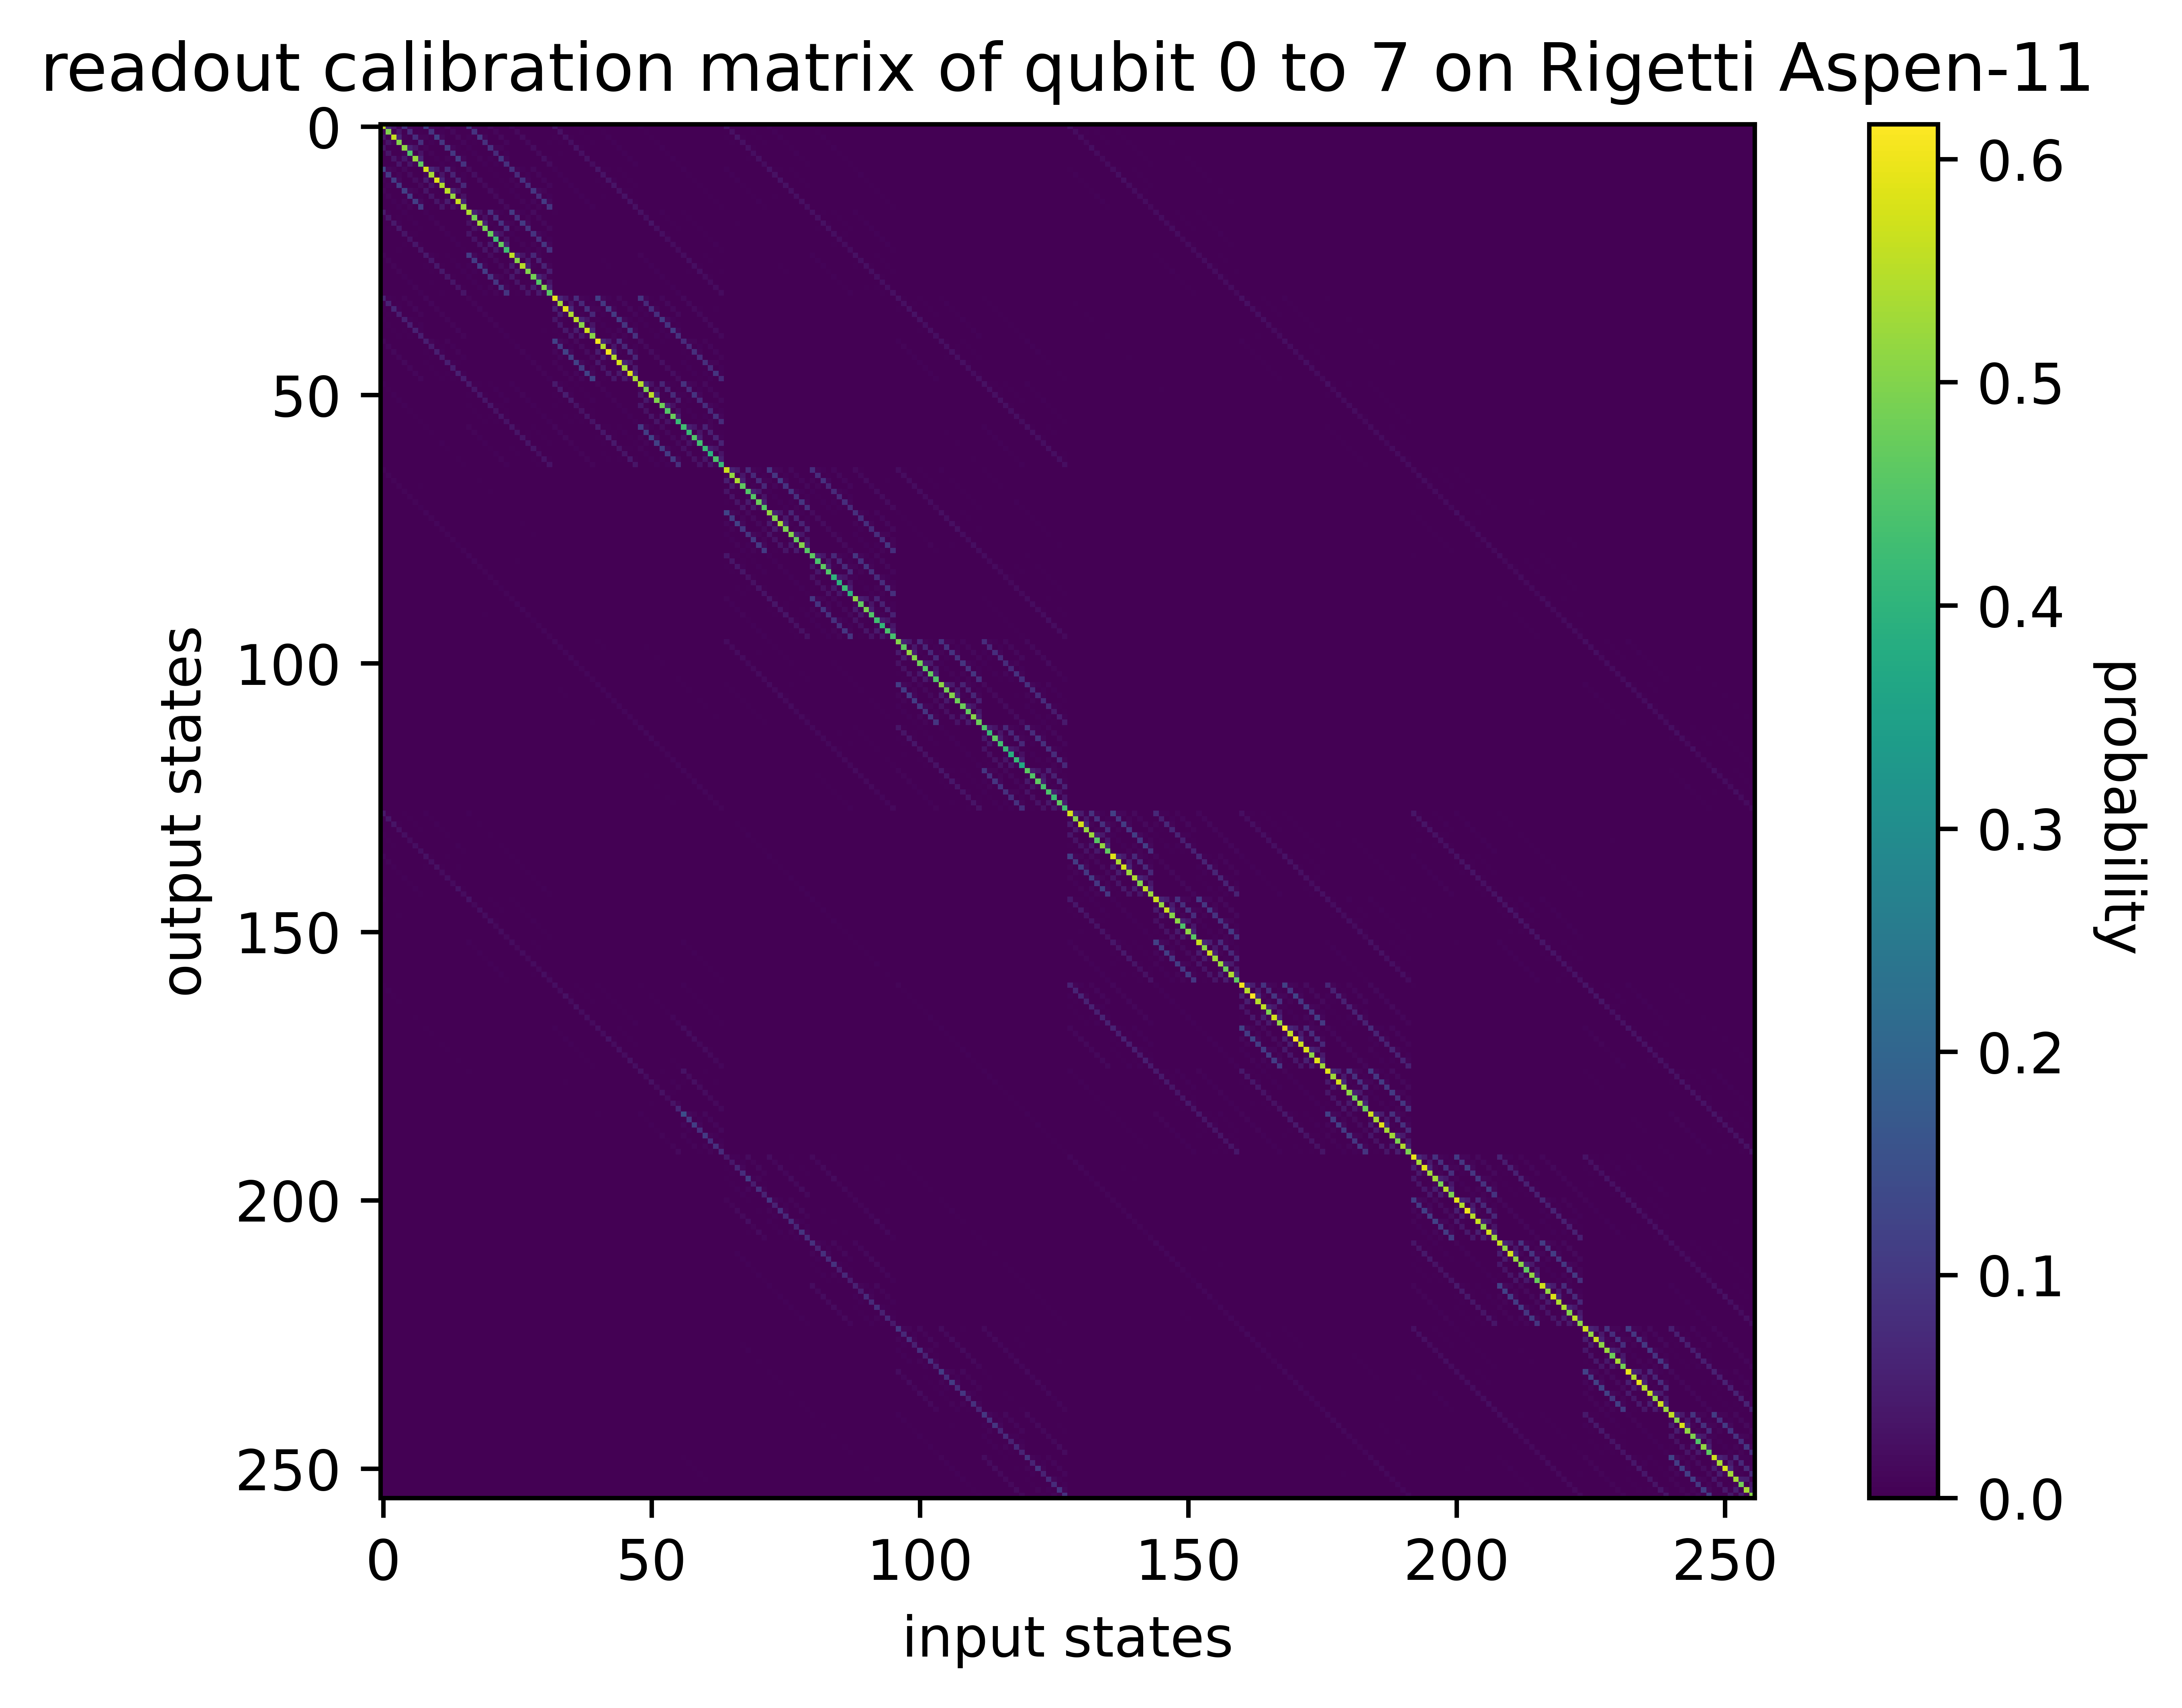

In [35]:
fig, ax = plt.subplots(dpi = 1000)
im = ax.imshow(meas_fitter.cal_matrix)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("probability", rotation=-90, va="bottom")
fig.tight_layout()
plt.xlabel("input states")
plt.ylabel("output states")
plt.title("readout calibration matrix of qubit 0 to 7 on Rigetti Aspen-11")
plt.show()

# How to check the job status
# why it would not finish
# what happen when the time expires
# 

In [1]:
import pickle
with open("readout_error_aspen-11_0to7.pkl", "rb") as f:
    records = pickle.load(f)

In [2]:
result = records["result"]
meas_fitter = records["meas_fitter"]
cal_matrix = meas_fitter.cal_matrix

In [3]:
from qiskit.ignis.mitigation.measurement import TensoredMeasFitter

In [5]:
from qiskit.result import Result

def separate_results(one_job_results):
    return [Result(backend_name=one_job_results.backend_name,
                   backend_version=one_job_results.backend_version,
                   qobj_id=one_job_results.qobj_id,
                   job_id=one_job_results.job_id,
                   success=True,
                   results=[results]) for results in one_job_results.results]


def merge_results(results_list):
    results = []
    for res in results_list:
        results += res.results
    return Result(backend_name=results_list[0].backend_name,
                  backend_version=results_list[0].backend_version,
                  qobj_id=results_list[0].qobj_id,
                  job_id=results_list[0].job_id,
                  success=True,
                  results=results)

In [6]:
results_list = separate_results(result)

In [7]:
len(results_list)

256

In [8]:
tensored_result = merge_results([results_list[0], results_list[-1]])

In [21]:
tensored_fitter = TensoredMeasFitter(tensored_result, mit_pattern=[[i] for i in range(num_qubits)])

In [22]:
tensored_fitter.cal_matrices

[array([[0.98364258, 0.10070801],
        [0.01635742, 0.89929199]]),
 array([[0.94384766, 0.07263184],
        [0.05615234, 0.92736816]]),
 array([[0.94445801, 0.12524414],
        [0.05554199, 0.87475586]]),
 array([[0.81604004, 0.13793945],
        [0.18395996, 0.86206055]]),
 array([[0.93054199, 0.09289551],
        [0.06945801, 0.90710449]]),
 array([[0.90795898, 0.0390625 ],
        [0.09204102, 0.9609375 ]]),
 array([[0.98486328, 0.05224609],
        [0.01513672, 0.94775391]]),
 array([[0.9329834 , 0.03234863],
        [0.0670166 , 0.96765137]])]

In [ ]:
[cal_matrix[i, (1 << num_qubits) - 1 - i] for i in range(1 << num_qubits)]

# TODO (by meeting with Debasis on 11 August)

- Compare the performance between complete QREM and tensored QREM (e.g. by check the fidelity of GHZ states)
- Check the correlation of the distant qubits (${}_8C_2$ combinations)

- 